In [10]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [13]:
# Load dataset
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [14]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# fill age with median:
# fill embarked with mode:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2475820669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2475820669.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [16]:
# drop cabin column too many missing values:
df.drop(columns=['Cabin'], inplace=True)

In [18]:
# Group-Based Insights:
# Survival by gender
print(df.groupby('Sex')['Survived'].mean())

# Survival by passenger class
print(df.groupby('Pclass')['Survived'].mean())

# Survival by embarkation port
print(df.groupby('Embarked')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


## **Visualizations**

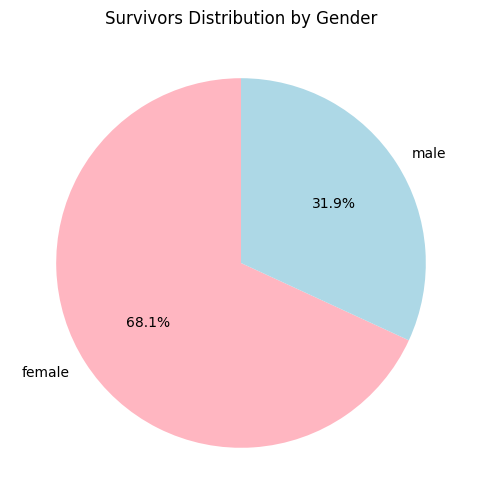

In [22]:
# Count survivors by gender
survival_counts = df[df['Survived']==1]['Sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    survival_counts,
    labels=survival_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightpink','lightblue']
)
plt.title("Survivors Distribution by Gender")
plt.show()

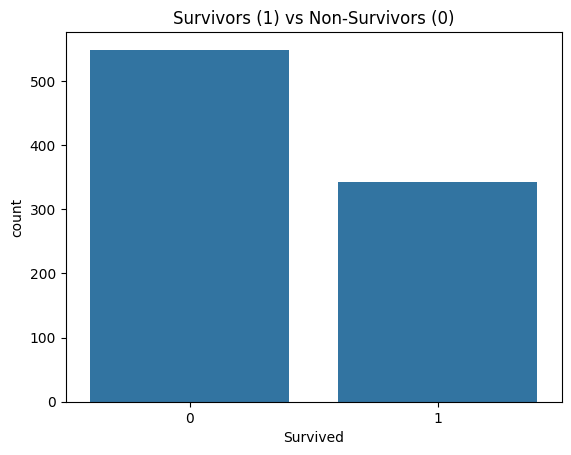

In [24]:
# number survived:
sns.countplot(data=df, x='Survived')
plt.title("Survivors (1) vs Non-Survivors (0)")
plt.show()

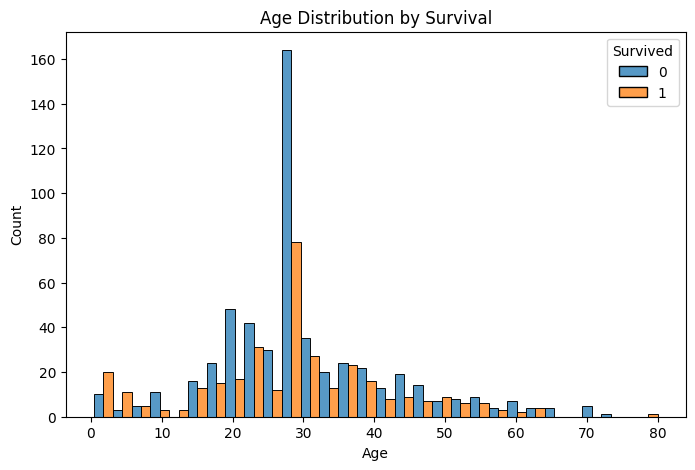

In [32]:
# Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, multiple="dodge", kde=False)
plt.title("Age Distribution by Survival")
plt.show()

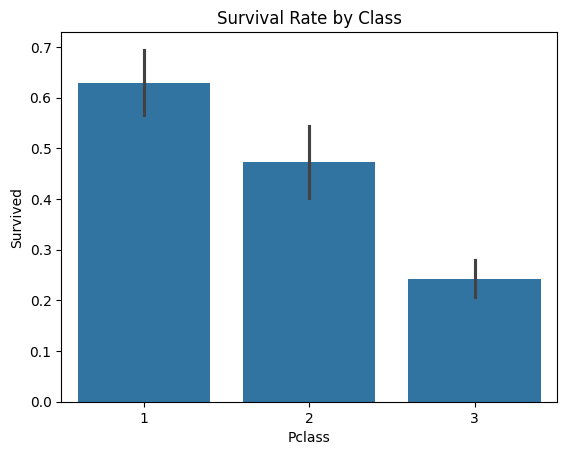

In [26]:
# survival rate by class:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Class")
plt.show()

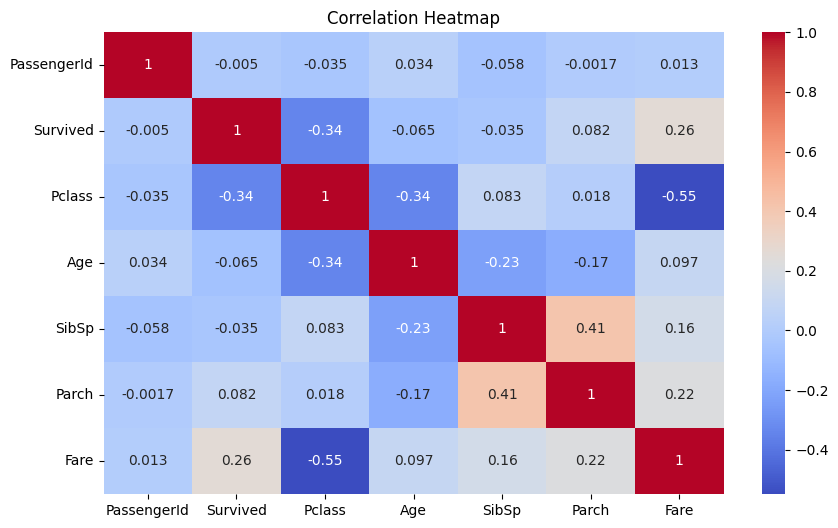

In [29]:
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Insights**


1. Females survived more than Males.
2. 1st class passengers had higher survival chances than 3rd class.
3. Higher survival rate than non survival
4. Children had better survival than older adults.
5. Fare & Pclass are inversely correlated.

